
# <p style="text-align:center"> <font color='darkorange'>**CUNEF**</font>
## <p style="text-align:center"> **TFM - Análisis de sentimiento pólitico en Twitter**
### <p style="text-align:center"> **2. World cloud y analisis de viralidad**</strong><br />
    
<p style="text-align:left">Pablo Mazariegos Reviriego - <font color='orange'>pablo.mazariegos@cunef.edu </font>

En este proyecto de Trabajo Fin de Máster, realizaremos un análisis de sentimiento de los tweets hechos por los 5 candidatos políticos a la presidencia de Madrid durante el período de campaña política que abarcó desde el 12 hasta el 27 de mayo de 2023. Utilizaremos una base de datos recopilada manualmente que contiene los tweets de los candidatos. El objetivo principal de este proyecto es desarrollar modelos de aprendizaje automático que puedan clasificar los tweets según su sentimiento (positivo, negativo o neutral).

El proyecto se organizará en diferentes cuadernos, cada uno enfocado en una etapa específica del proceso:

 0. Data Reading and Problem statement
 1. EDA
 2. <font color='darkgreen'>**Word Cloud y Análisis de viralidad**</font>
 3. Best Model and Explainability

In this notebook we will perform an Exploratory Data Analysis on the restaurants dataset we exported in the _Data selection & variables preparation_ notebook. We will look at the variables correlation, null, non and nan analysis of the variables and if needed we will drop those that will not work for our future models. 

 INDICE:

 - [Importación de Librerias](#0) 
 - [Funciones utilizadas en este notebook](#1) 
 - [Carga de datos](#2)
 - [Exploración de los datos](#3)
 - [Exploración de los datos](#4)

##  <a name="0"> Importación de Librerias</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
import nltk

import warnings
warnings.filterwarnings('ignore')

##  <a name="1">Funciones utilizadas en este notebook</a>

In [2]:
from wordcloud import WordCloud

def plot_wordcloud(df, partido):
    """
    Función para plotear la wordcloud para un partido especificado.

    Argumentos:
        df: DataFrame que contiene los datos.
        partido: El nombre del partido para el que se realizará la visualización.
    """
    
    # Filtrar el DataFrame para solo incluir posts del partido especificado
    df_party = df_token[df_token['partido'] == partido]

    # Concatenar todos los posts en una sola cadena
    all_words = ' '.join([text for text in df_party['Sentimiento_clean']])

    # Generar la wordcloud
    wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    # Plotear la wordcloud
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'WordCloud para {partido}')
    plt.show()


##  <a name="2"> Carga de datos</a>

In [3]:
file_path = '../data/processed/df_sentimiento.csv'
df = pd.read_csv(file_path, usecols=['partido', 'candidato', 'nick', 'followers', 'fecha',
       'post', 'sentimiento', 'negative', 'neutral', 'positive', 'video',
       'foto', 'repost', 'retweet', 'viewed', 'comments', 'comments vs viewed',
       'shared', 'shared vs viewed', 'likes', 'likes vs viewed', 'votos',
       'porcentaje', 'escaños'])

df.head()

partido          candidato          nick  followers       fecha  \
0      PP  Isabel Díaz Ayuso   @IdiazAyuso   912100.0  2023-05-12   
1      PP  Isabel Díaz Ayuso   @IdiazAyuso   912100.0  2023-05-12   
2      PP  Isabel Díaz Ayuso   @IdiazAyuso   912100.0  2023-05-12   
3      PP  Isabel Díaz Ayuso   @IdiazAyuso   912100.0  2023-05-13   
4      PP  Isabel Díaz Ayuso   @IdiazAyuso   912100.0  2023-05-13   

                                                post sentimiento  negative  \
0  Comenzamos la campaña, una vez más, junto a la...    Positive  0.034475   
1  Madrid es la región del Espíritu de Ermua, la ...    Negative  0.904359   
2  Majadahonda con ganas de Libertad, familia, un...    Positive  0.014554   
3                                               ❤️❤️    Positive  0.005584   
4                      Presidente: líbranos del mal.    Negative  0.680318   

    neutral  positive  ...    viewed comments comments vs viewed shared  \
0  0.037882  0.927643  ...   58700.0    198.0           0.003373  261.0   
1  0.060345  0.035295  ...  101600.0    550.0           0.005413  561.0   
2  0.021517  0.963929  ...   59700.0    140.0           0.002345  213.0   
3  0.010402  0.984014  ...  159100.0    155.0           0.000974  343.0   
4  0.128941  0.190741  ...  330800.0    893.0           0.002700  549.0   

   shared vs viewed   likes  likes vs viewed      votos  porcentaje  escaños  
0          0.004446  1260.0         0.021465  1586985.0      0.4734     71.0  
1          0.005522  2127.0         0.020935  1586985.0      0.4734     70.0  
2          0.003568  1042.0         0.017454  1586985.0      0.4734     70.0  
3          0.002156  2958.0         0.018592  1586985.0      0.4734     70.0  
4          0.001660  2592.0         0.007836  1586985.0      0.4734     70.0  

[5 rows x 24 columns]

##  <a name="3"> Exploración de los datos</a>

In [4]:
#Al cargar los datos crea una fila de nulos
df = df.drop(773)
df = df.drop([178, 486])

# Convertir la columna 'fecha' a datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Convertir las columnas 'video', 'repost', 'retweet' a booleanos
df['foto'] = df['foto'].astype(bool)
df['video'] = df['video'].astype(bool)
df['repost'] = df['repost'].astype(bool)
df['retweet'] = df['retweet'].astype(bool)

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 771 entries, 0 to 772
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   partido             771 non-null    object        
 1   candidato           771 non-null    object        
 2   nick                771 non-null    object        
 3   followers           771 non-null    float64       
 4   fecha               771 non-null    datetime64[ns]
 5   post                771 non-null    object        
 6   sentimiento         771 non-null    object        
 7   negative            771 non-null    float64       
 8   neutral             771 non-null    float64       
 9   positive            771 non-null    float64       
 10  video               771 non-null    bool          
 11  foto                771 non-null    bool          
 12  repost              771 non-null    bool          
 13  retweet             771 non-null    bool          

partido               0
candidato             0
nick                  0
followers             0
fecha                 0
post                  0
sentimiento           0
negative              0
neutral               0
positive              0
video                 0
foto                  0
repost                0
retweet               0
viewed                0
comments              0
comments vs viewed    0
shared                0
shared vs viewed      0
likes                 0
likes vs viewed       0
votos                 0
porcentaje            0
escaños               0
dtype: int64

##  <a name="4"> Tokenización de los tweets</a>

## Transformación para la Tokenización

In [5]:
# Crear el nuevo DataFrame con las columnas 'partido', 'fecha', 'post' y 'sentimiento'
df_token = df[['partido', 'fecha', 'post', 'sentimiento']].copy()

# Convierte la columna post a minusculas
df_token['post'] = df_token['post'].str.lower()

# Borramos los usuarios de los posts
df_token['post'] = df_token['post'].str.replace('@[^\s]+','')

# Borrado de signos de puntuación
df_token['post'] = df_token['post'] .str.replace('[^\w\s]','')

# Borrado de emojis
df_token['post'] = df_token['post'] .str.replace('[^\x00-\x7F]+','')

# Borrado de Links
df_token['post'] = df_token['post'].str.replace('http\S+|www.\S+','')

df_token['post'].head()

0    comenzamos la campaa una vez ms junto a la agr...
1    madrid es la regin del espritu de ermua la que...
2    majadahonda con ganas de libertad familia unid...
3                                                     
4                           presidente lbranos del mal
Name: post, dtype: object


## Tokenización y supresión de stopwords


In [6]:
# Convert the text to string.

df_token['post'] = df_token['post'].astype(str)

translator = str.maketrans('', '', string.punctuation)
stopwords = nltk.corpus.stopwords.words('spanish')


df_token["Sentimiento_clean"] = df_token["post"].map(lambda x: x.strip().lower().translate(translator))
df_token["Sentimiento_clean"].head()

0    comenzamos la campaa una vez ms junto a la agr...
1    madrid es la regin del espritu de ermua la que...
2    majadahonda con ganas de libertad familia unid...
3                                                     
4                           presidente lbranos del mal
Name: Sentimiento_clean, dtype: object

In [7]:
# Delete stopwords.
df_token["Sentimiento_clean"] = df_token["Sentimiento_clean"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

df_token.head()

partido      fecha                                               post  \
0      PP 2023-05-12  comenzamos la campaa una vez ms junto a la agr...   
1      PP 2023-05-12  madrid es la regin del espritu de ermua la que...   
2      PP 2023-05-12  majadahonda con ganas de libertad familia unid...   
3      PP 2023-05-13                                                      
4      PP 2023-05-13                         presidente lbranos del mal   

  sentimiento                                  Sentimiento_clean  
0    Positive  comenzamos campaa vez ms junto agricultura cam...  
1    Negative  madrid regin espritu ermua admite totalitarios...  
2    Positive  majadahonda ganas libertad familia unidad aleg...  
3    Positive                                                     
4    Negative                             presidente lbranos mal

## Transformación de las variables categóricas

In [8]:
# Convert the sentiment column to numerical values.

df_token['sentimiento'] = df_token['sentimiento'].map({'Neutral': 0, 'Positive': 1, 'Negative': -1})

# Display first 5 rows

df_token.head()

partido      fecha                                               post  \
0      PP 2023-05-12  comenzamos la campaa una vez ms junto a la agr...   
1      PP 2023-05-12  madrid es la regin del espritu de ermua la que...   
2      PP 2023-05-12  majadahonda con ganas de libertad familia unid...   
3      PP 2023-05-13                                                      
4      PP 2023-05-13                         presidente lbranos del mal   

   sentimiento                                  Sentimiento_clean  
0            1  comenzamos campaa vez ms junto agricultura cam...  
1           -1  madrid regin espritu ermua admite totalitarios...  
2            1  majadahonda ganas libertad familia unidad aleg...  
3            1                                                     
4           -1                             presidente lbranos mal

5. Wordcloud e histograma de las palabras

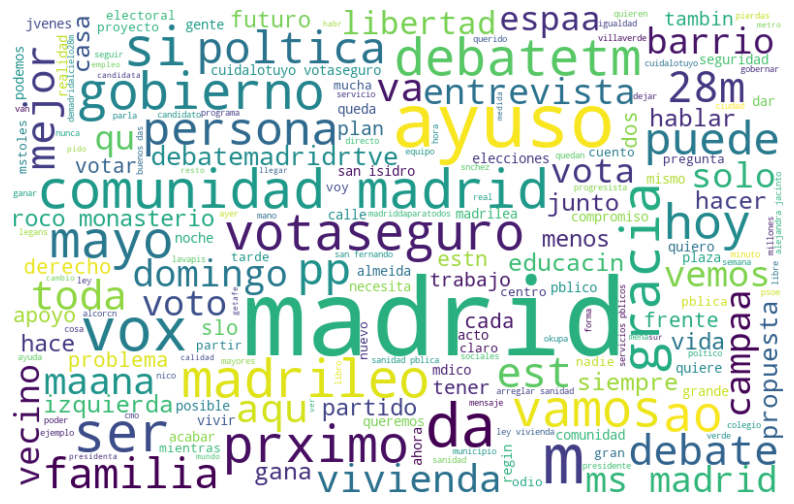

In [9]:
# Wordcloud of the most common words.

all_words = ' '.join([text for text in df_token['Sentimiento_clean']])

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis('off')

plt.show()

## Por partido:

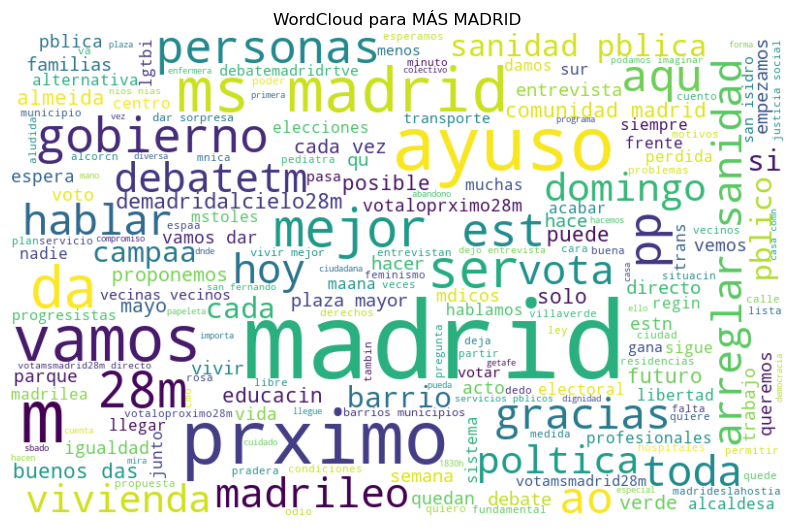

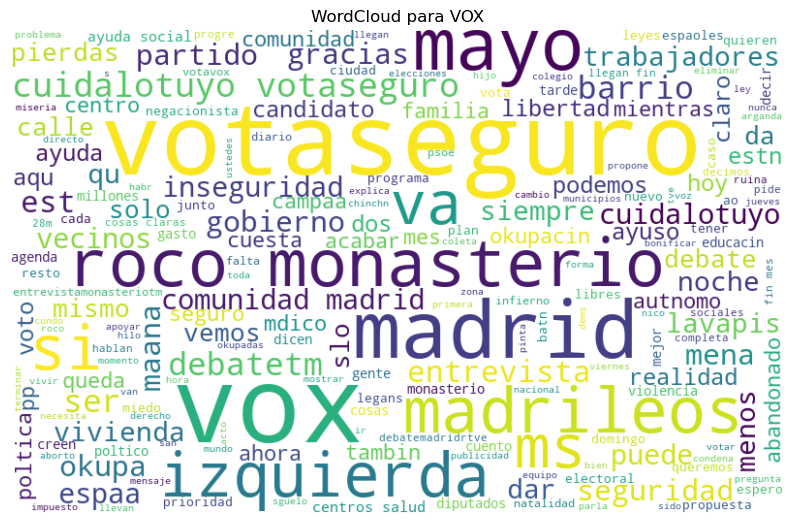

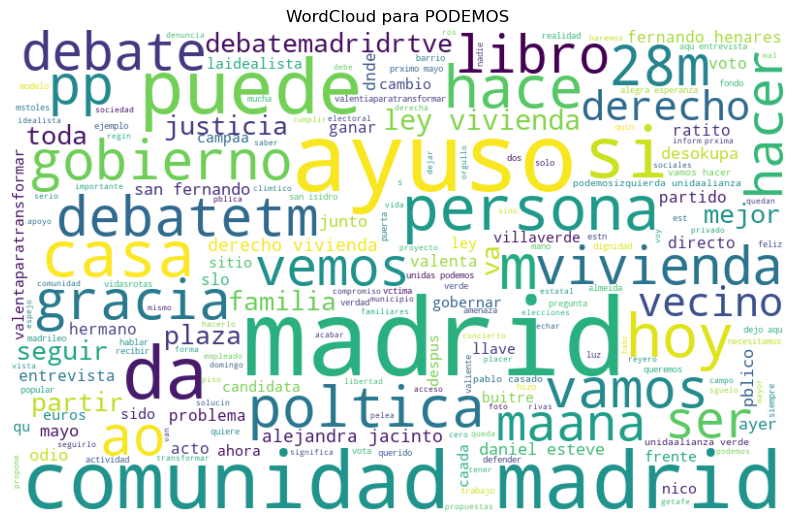

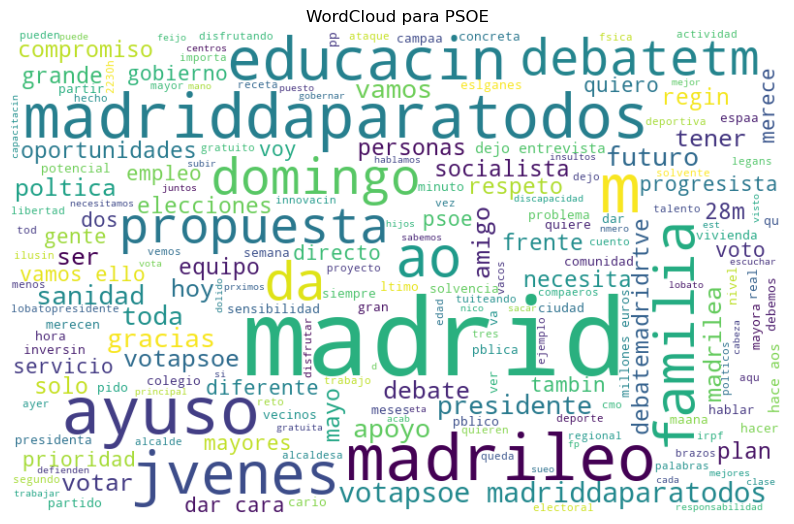

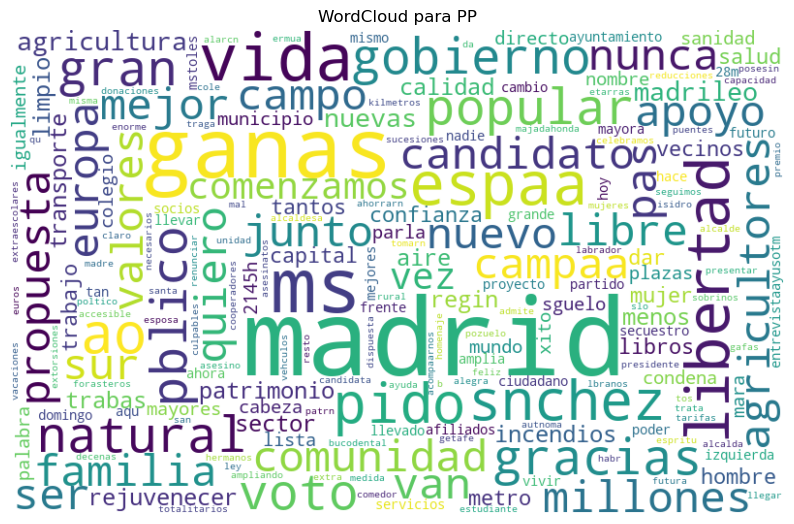

In [10]:
partidos = ['MÁS MADRID', 'VOX', 'PODEMOS', 'PSOE', 'PP']

for partido in partidos:
    plot_wordcloud(df, partido)

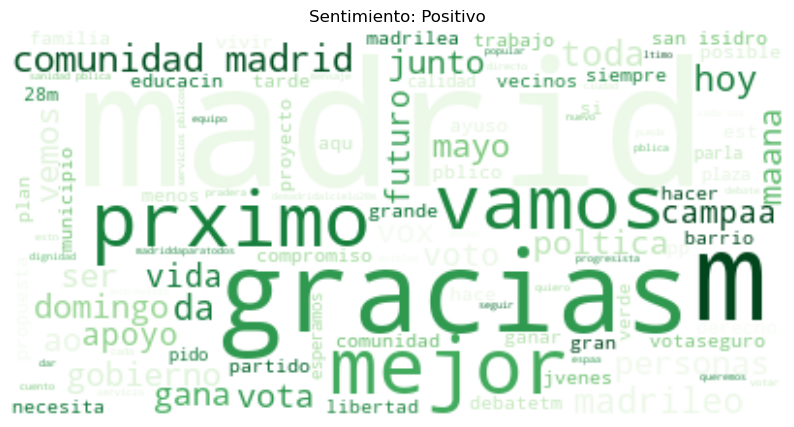

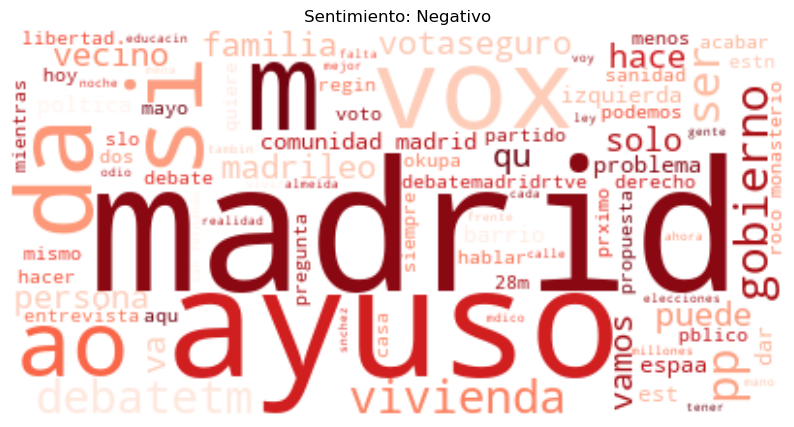

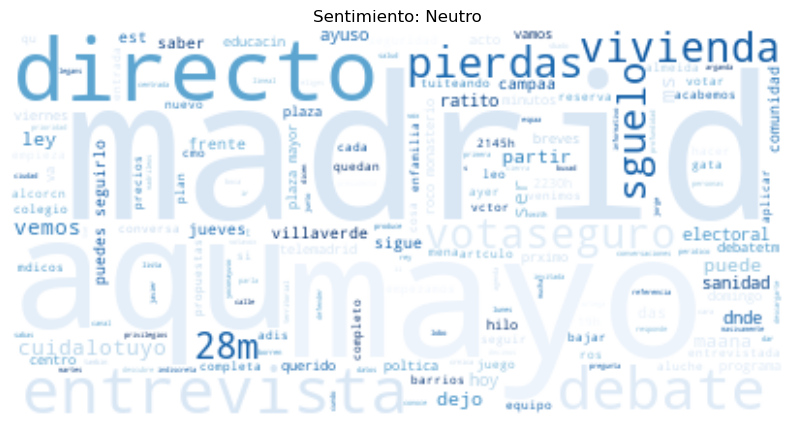

In [11]:
# Crear un diccionario de colores para los sentimientos
color_dict = {1: 'Greens', -1: 'Reds', 0: 'Blues'}


# Iterar sobre cada sentimiento
for sentimiento in df_token['sentimiento'].unique():
    # Crear un subconjunto del DataFrame para el sentimiento actual
    subset = df_token[df_token['sentimiento'] == sentimiento]
    
    # Unir todos los textos de los posts del sentimiento actual
    text = ' '.join(post for post in subset['Sentimiento_clean'])
    
    # Crear la nube de palabras para el sentimiento actual
    wordcloud = WordCloud(background_color='white', colormap=color_dict[sentimiento]).generate(text)

    # Mostrar la nube de palabras para el sentimiento actual
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    if sentimiento == 1:
        plt.title('Sentimiento: Positivo')
    elif sentimiento == -1:
        plt.title('Sentimiento: Negativo')
    else:
        plt.title('Sentimiento: Neutro')
    plt.axis('off')
    plt.show()


## Por partido:

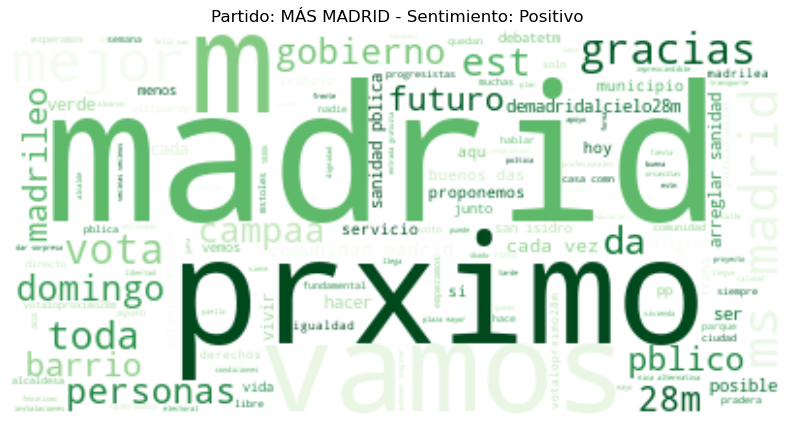

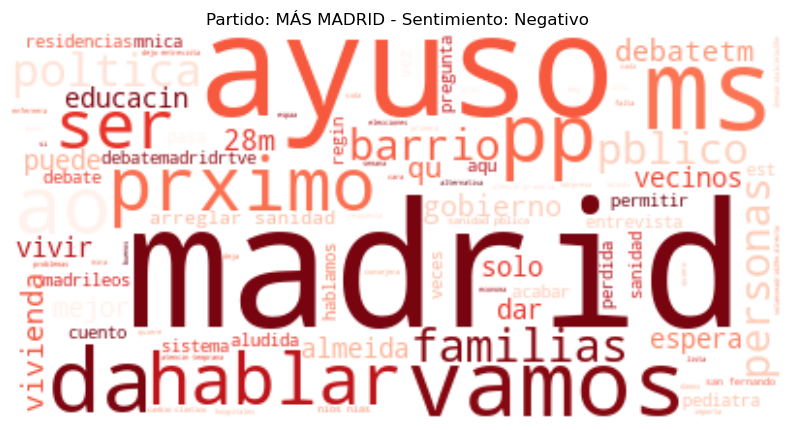

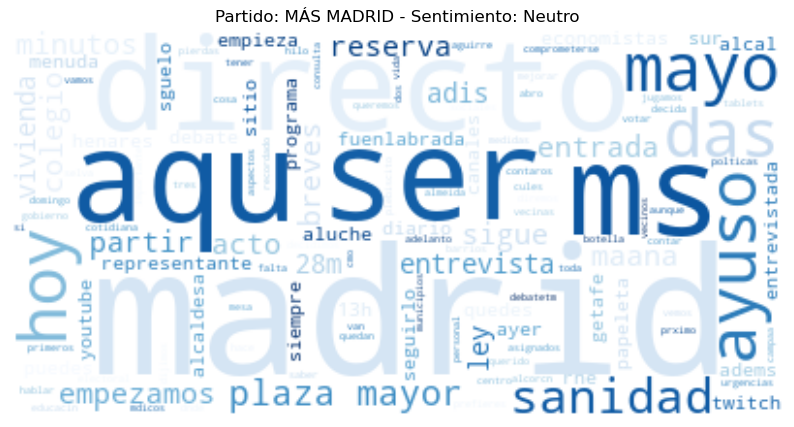

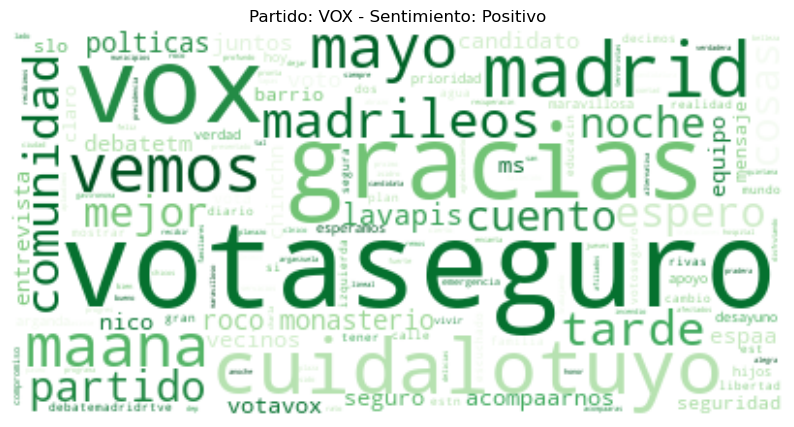

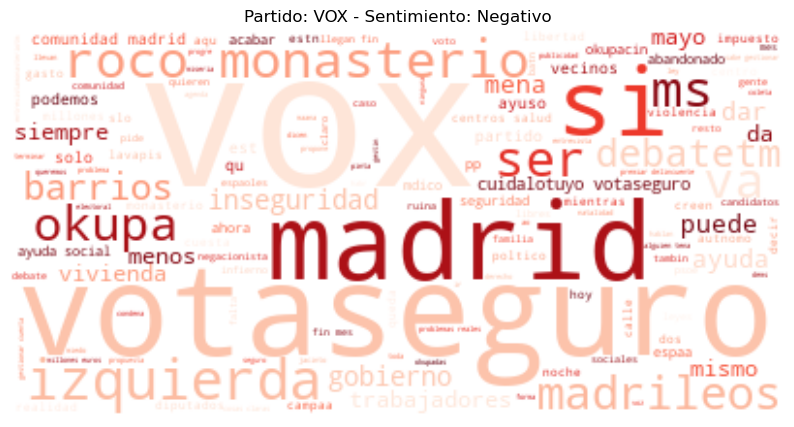

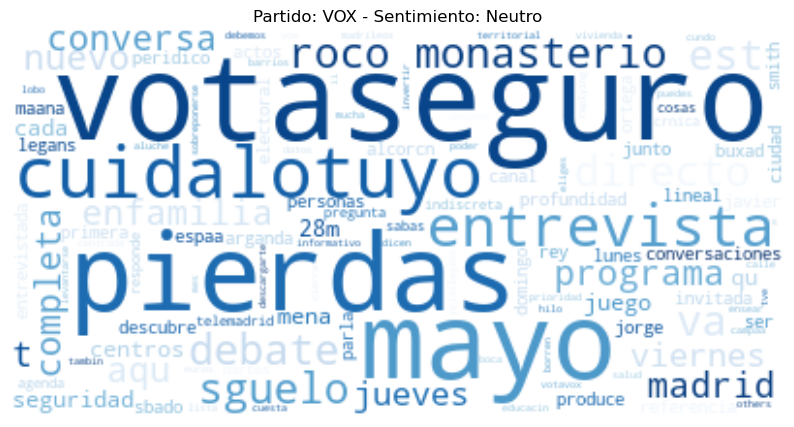

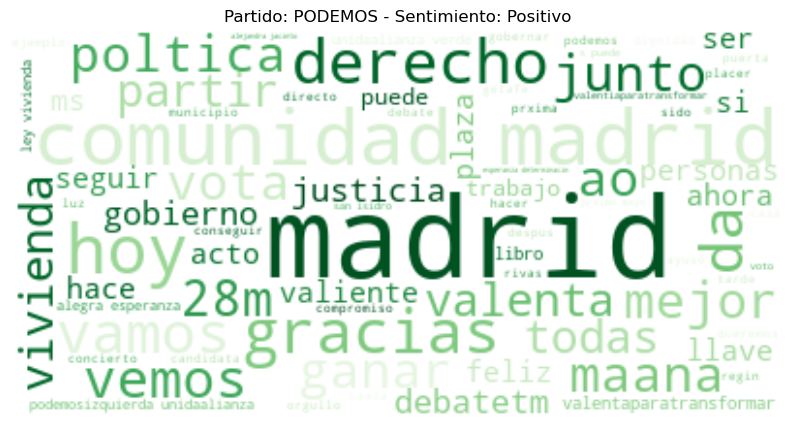

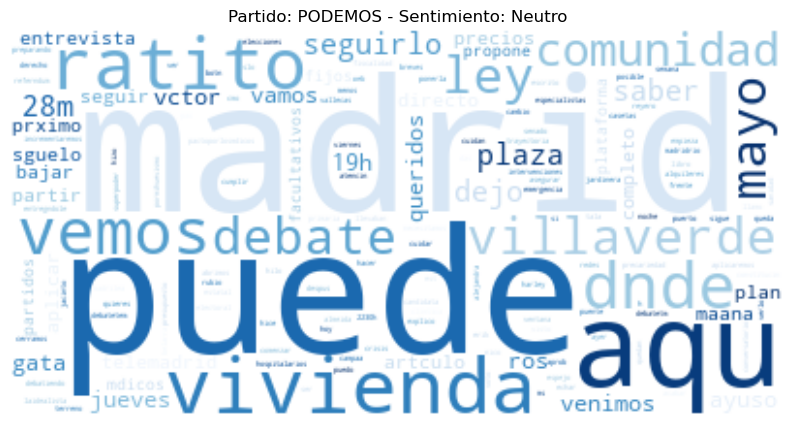

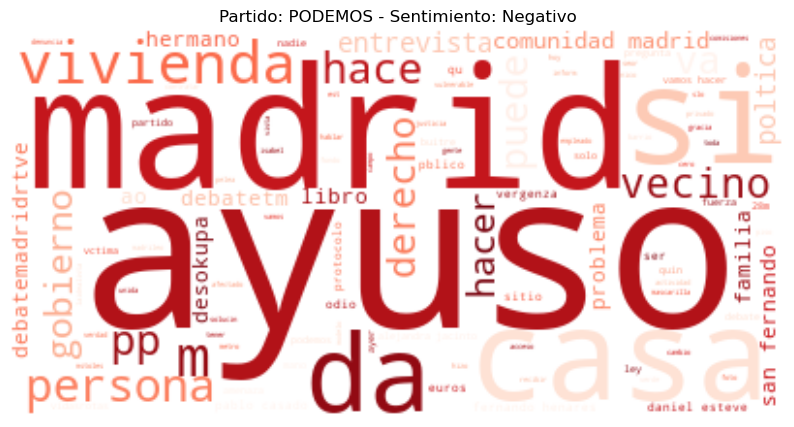

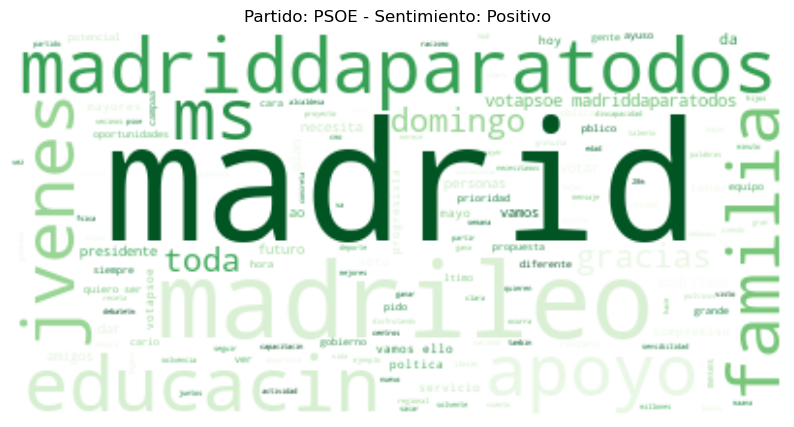

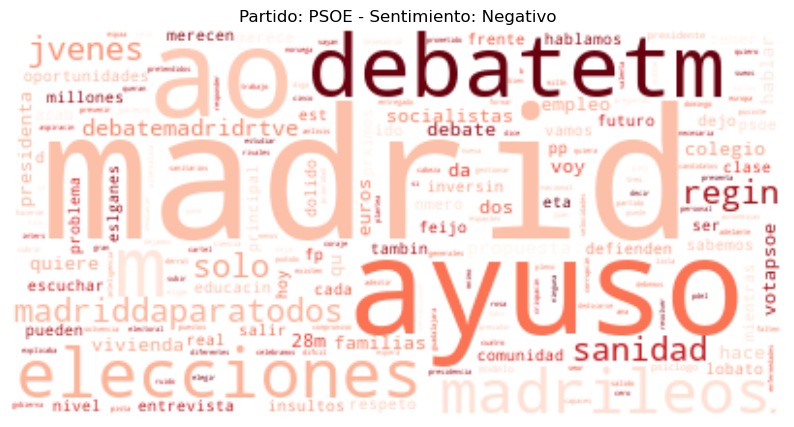

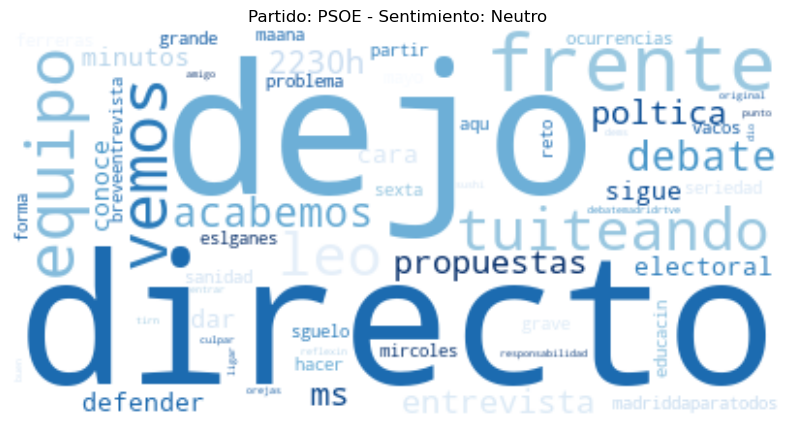

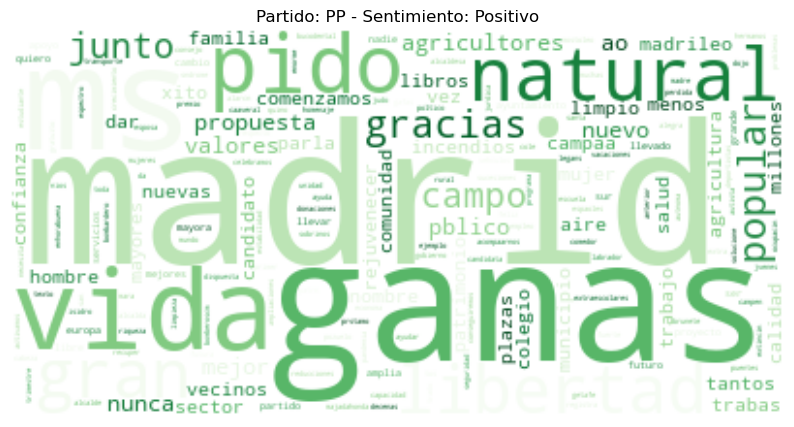

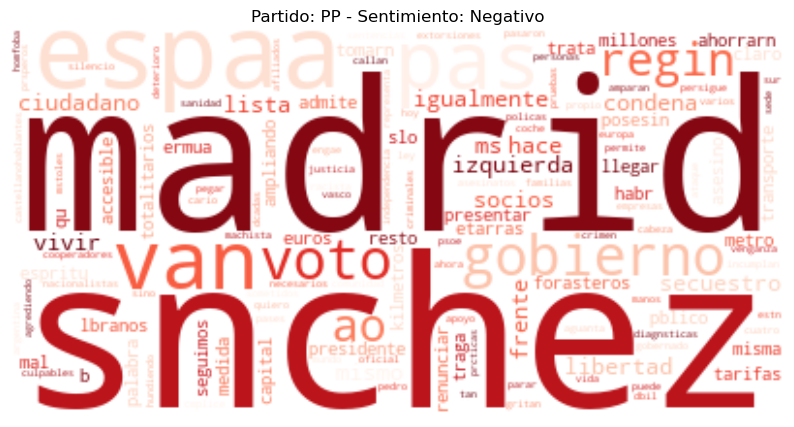

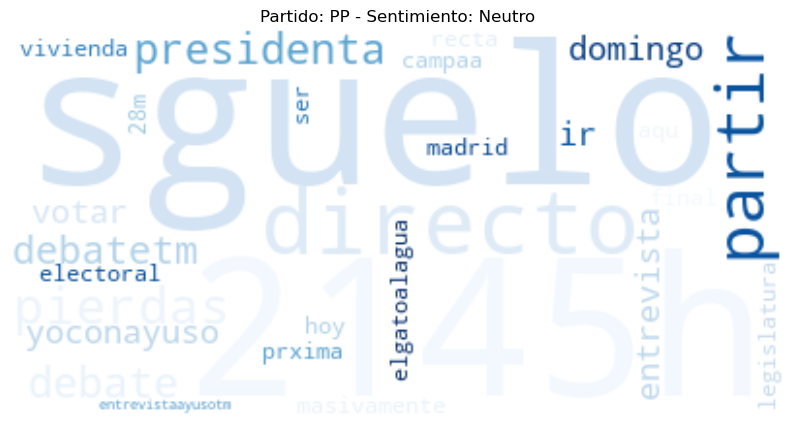

In [12]:
# Crear un diccionario de colores para los sentimientos
color_dict = {1: 'Greens', -1: 'Reds', 0: 'Blues'}

# Los nombres de los partidos
partidos = ['MÁS MADRID', 'VOX', 'PODEMOS', 'PSOE', 'PP']

# Iterar sobre cada partido
for partido in partidos:
    # Crear un subconjunto del DataFrame para el partido actual
    df_partido = df_token[df_token['partido'] == partido]
    
    # Iterar sobre cada sentimiento
    for sentimiento in df_partido['sentimiento'].unique():
        # Crear un subconjunto del DataFrame para el sentimiento actual
        subset = df_partido[df_partido['sentimiento'] == sentimiento]
        
        # Unir todos los textos de los posts del sentimiento actual
        text = ' '.join(post for post in subset['Sentimiento_clean'])
        
        # Crear la nube de palabras para el sentimiento actual
        wordcloud = WordCloud(background_color='white', colormap=color_dict[sentimiento]).generate(text)

        # Mostrar la nube de palabras para el sentimiento actual
        plt.figure(figsize=(10, 7))
        plt.imshow(wordcloud, interpolation='bilinear')
        if sentimiento == 1:
            plt.title(f'Partido: {partido} - Sentimiento: Positivo')
        elif sentimiento == -1:
            plt.title(f'Partido: {partido} - Sentimiento: Negativo')
        else:
            plt.title(f'Partido: {partido} - Sentimiento: Neutro')
        plt.axis('off')
        plt.show()


Estudiar el sentimiento

In [15]:
# Agrupar por sentimiento y calcular la media de las interacciones
sentiment_analysis = df.groupby('sentimiento')[['viewed', 'comments', 'shared', 'likes']].mean()
print(sentiment_analysis)


                   viewed    comments      shared        likes
sentimiento                                                   
Negative     81177.327586  230.807471  650.882184  1352.402299
Neutral      41398.818182  106.649351  252.298701   535.298701
Positive     37551.815029  139.684971  224.554913   558.320809


Comparar candidatos y partidos

In [16]:
# Agrupar por candidato y calcular la media de las interacciones
candidate_analysis = df.groupby(['partido', 'candidato'])[['viewed', 'comments', 'shared', 'likes']].mean()
print(candidate_analysis)


                                     viewed    comments      shared  \
partido    candidato                                                  
MÁS MADRID Mónica García       44518.919283  135.094170  137.358744   
PODEMOS    Alejandra Jacinto   56716.218274  161.680203  658.624365   
PP         Isabel Díaz Ayuso  168712.962963  502.629630  636.425926   
PSOE       Juan Lobato         19625.926316  195.852632  223.505263   
VOX        Rocío Monasterio    61161.237624  144.252475  532.920792   

                                    likes  
partido    candidato                       
MÁS MADRID Mónica García       318.309417  
PODEMOS    Alejandra Jacinto  1211.248731  
PP         Isabel Díaz Ayuso  2405.888889  
PSOE       Juan Lobato         378.831579  
VOX        Rocío Monasterio   1136.272277  


Estudiar el impacto del tiempo